In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


In [177]:
merged_data = pd.read_csv('merged_data.csv')
fighter_stats = pd.read_csv('final_df.csv')
fighter_stats_encoded = pd.read_csv('final_encoded.csv')
match_stats = pd.read_csv('Match_data2.csv')
fighter_stats = fighter_stats.iloc[:, 1:]
fighter_stats_encoded = fighter_stats_encoded.iloc[:, 1:]
match_stats = match_stats.iloc[:, 1:]
fighter_stats['fighter_name'] = fighter_stats['fighter_name'].str.lower().str.strip()
match_stats['name_red'] = match_stats['name_red'].str.lower().str.strip()
match_stats['name_blue'] = match_stats['name_blue'].str.lower().str.strip()

### Matching the data of Match_statiscs with the fighter_statistics data

In [178]:
fighter_name_order = fighter_stats['fighter_name'].tolist()

# Function to reorder match stats by the order of fighter names in fighter_stats
def reorder_names(df, fighter_name_order):
    df['name_red'] = pd.Categorical(df['name_red'], categories=fighter_name_order, ordered=True)
    df['name_blue'] = pd.Categorical(df['name_blue'], categories=fighter_name_order, ordered=True)
    df = df.sort_values(by=['name_red', 'name_blue'])  # Sorting by both columns
    return df

# Apply reordering to match_stats dataframe
match_stats = reorder_names(match_stats, fighter_name_order)

match_stats['Winner'] = match_stats['Winner'].replace({'Red': 1, 'Blue': 0})

C:\Users\H\AppData\Local\Temp\ipykernel_17500\3134456308.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  match_stats['Winner'] = match_stats['Winner'].replace({'Red': 1, 'Blue': 0})


In [179]:
match_stats.drop(columns=['name_blue'], inplace=True)

match_stats = match_stats.loc[:, ~match_stats.columns.str.startswith('B_')]


In [180]:
match_stats.rename(columns={'Winner':'win'}, inplace=True)

In [181]:
match_stats.head()

,name_red,win,title_bout,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,...,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,weight_class_Bantamweight,weight_class_CatchWeight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_LightHeavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_OpenWeight,weight_class_Welterweight,weight_class_WomenBantamweight,weight_class_WomenFeatherweight,weight_class_WomenFlyweight,weight_class_WomenStrawweight,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
310,felice herrig,1,False,0.281984,0.626953,0.500714,0.440737,0.354600,0.007447,0.250130,0.504150,0.000006,9.536743e-07,79.604128,37.435725,87.012642,36.583100,81.565950,39.097496,87.947430,37.213849,2.522371,0.752266,0.203849,0.044773,56.786279,21.413612,74.830203,26.833773,16.565969,9.817263,6.484164,4.307287,6.251880,6.204850,5.698275,5.442040,71.777940,32.677825,83.530910,...,35.149817,4.213887,391.402464,45,0,2,0,4,11,10,0,0,1,3,5,2,0,187.96,190.50,170.0,36.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2255,felice herrig,0,False,0.194397,0.062561,0.381554,0.467619,0.110259,0.010435,0.000488,0.000000,0.000000,0.000000e+00,105.935059,41.244781,132.443512,66.719055,114.913116,49.463684,150.556427,84.315063,3.885864,1.063019,1.392456,0.055481,93.395752,31.704620,103.052460,41.915161,7.355042,5.434509,22.269043,18.948059,5.184265,4.105652,7.122009,5.855835,90.146149,32.043823,100.994720,...,124.482605,130.358643,997.033691,37,1,2,0,3,8,8,0,0,0,1,7,0,0,182.88,185.42,263.0,40.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3010,felice herrig,0,False,0.875000,0.020508,0.441960,0.299949,0.329590,0.267393,0.000000,0.000977,0.000488,4.882812e-04,68.751221,30.871338,72.394775,21.135498,75.272217,37.207520,78.559814,26.712891,0.482666,0.373535,3.169434,1.121094,53.033691,20.022217,58.109863,12.332764,13.434082,8.983398,11.358398,7.510742,2.283447,1.865723,2.926514,1.291992,59.266113,23.787354,66.268555,...,10.542969,55.051758,512.129395,32,1,3,0,3,8,5,0,0,0,4,3,0,1,172.72,175.26,155.0,30.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2857,felice herrig,1,False,0.500000,0.000000,0.540000,0.410000,0.000000,0.750000,0.000000,0.500000,0.000000,0.000000e+00,99.500000,52.000000,85.500000,36.000000,108.500000,61.000000,89.500000,39.000000,0.000000,0.000000,1.500000,1.000000,76.000000,34.500000,78.000000,31.500000,14.000000,9.500000,7.000000,4.000000,9.500000,8.000000,0.500000,0.500000,85.500000,42.500000,63.000000,...,26.000000,141.500000,581.500000,4,0,1,0,1,1,1,0,0,0,0,1,0,0,182.88,185.42,170.0,33.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1823,felice herrig,0,False,0.515869,1.253906,0.457378,0.439578,0.125645,0.447314,1.114258,0.064453,0.500000,9.765625e-04,76.701904,35.479492,83.643311,37.781738,82.822266,40.427734,96.405029,48.343750,0.893555,0.408203,3.686523,1.338379,59.318848,23.218018,66.923584,25.342285,10.337158,6.656982,9.571777,6.295410,7.045898,5.604492,7.147949,6.144043,56.897461,25.042969,66.928467,...,124

In [182]:
ordered_match_stats = ordered_match_stats.iloc[:, 1:]

In [183]:
mydata = pd.DataFrame()

In [184]:
mydata['name'] = fighter_stats['fighter_name']

### first Neural Network for predicting strike accuarcy

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [186]:
X = match_stats[['R_avg_SIG_STR_att', 'R_avg_SIG_STR_landed']].dropna()
y = match_stats['R_avg_SIG_STR_pct'].dropna()

assert len(X) == len(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()

model.add(Dense(64, input_dim=2, activation='relu'))

# Hidden layer
model.add(Dense(32, activation='relu'))

# Output layer (since we are predicting a single continuous value)
model.add(Dense(1, activation='linear'))




C:\Users\H\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compiling and optimization

In [187]:
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

### Model Training

In [188]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data
loss, mae = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")


Epoch 1/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0522 - mae: 0.1722 - val_loss: 0.0056 - val_mae: 0.0427
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0057 - mae: 0.0445 - val_loss: 0.0053 - val_mae: 0.0414
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0059 - mae: 0.0436 - val_loss: 0.0048 - val_mae: 0.0385
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055 - mae: 0.0436 - val_loss: 0.0052 - val_mae: 0.0407
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0048 - mae: 0.0401 - val_loss: 0.0047 - val_mae: 0.0398
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0049 - mae: 0.0391 - val_loss: 0.0046 - val_mae: 0.0400
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0048 - mae: 0.0401 - val_loss: 0.0045 - val_mae: 0.0384
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0045 - mae: 0.0374 - val_loss: 0.0046 - val_mae: 0.0385
Epoch 9/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

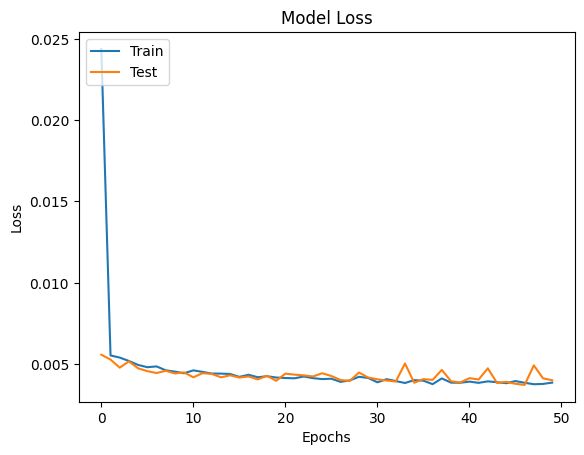

In [189]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()




In [190]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Print a few predictions
for i in range(10):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test.iloc[i]}")


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted: [0.46255755], Actual: 0.46
Predicted: [0.52327156], Actual: 0.5299267578125
Predicted: [0.4587286], Actual: 0.4649999999999999
Predicted: [0.45433834], Actual: 0.45
Predicted: [0.30636922], Actual: 0.3325
Predicted: [0.6542062], Actual: 0.65
Predicted: [0.3902182], Actual: 0.3855459213256835
Predicted: [0.54556656], Actual: 0.2724999999999999
Predicted: [0.4395653], Actual: 0.46125
Predicted: [0.50330454], Actual: 0.46625


In [191]:
# Evaluate the model on the test data
loss, mae = model.evaluate(X_test, y_test)

# Print out the loss and MAE
print(f"Test Loss (MSE): {loss}")
print(f"Test MAE: {mae}")


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 0.0041 - mae: 0.0352
Test Loss (MSE): 0.004008974879980087
Test MAE: 0.03559635207056999


In [192]:
from sklearn.metrics import r2_score

# Get predictions
y_pred = model.predict(X_test)

# Calculate R² (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)

# Convert R² to percentage
r2_percentage = r2 * 100

# Print out R² as percentage
print(f"R² (Coefficient of Determination): {r2_percentage:.2f}%")


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
R² (Coefficient of Determination): 72.20%


### Validation

In [193]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
X = match_stats[['R_avg_SIG_STR_att', 'R_avg_SIG_STR_landed']].dropna()
y = match_stats['R_avg_SIG_STR_pct'].dropna()

assert len(X) == len(y)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds
fold = 1
mse_scores = []

for train_index, test_index in kf.split(X):
    print(f"Training fold {fold}...")
    
    # Split data into train/test for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Build the model
    model = Sequential()
    model.add(Dense(64, input_dim=2, activation='relu'))
    model.add(Dense(32, activation='relu'))  # Hidden layer
    model.add(Dense(1, activation='linear'))  # Output layer
    
    # Compile the model
    model.compile(optimizer='adam', loss='mse')
    
    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
    
    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    
    print(f"Fold {fold} MSE: {mse:.4f}")
    fold += 1

# Overall Results
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
print(f"\nCross-Validation Results:")
print(f"Mean MSE: {mean_mse:.4f}")
print(f"Standard Deviation of MSE: {std_mse:.4f}")


Training fold 1...


C:\Users\H\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 1 MSE: 0.0038
Training fold 2...


C:\Users\H\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 2 MSE: 0.0037
Training fold 3...


C:\Users\H\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 3 MSE: 0.0037
Training fold 4...


C:\Users\H\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Fold 4 MSE: 0.0051
Training fold 5...


C:\Users\H\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Fold 5 MSE: 0.0046

Cross-Validation Results:
Mean MSE: 0.0042
Standard Deviation of MSE: 0.0006


In [194]:
corr = merged_data[['Height_cm','Weight_kg','Reach_cm','SLpM','Str_Acc%','Strikes_absorbed/m','Str_Def%','TD_Avg','TD_Def%','Sub_Avg','TD_Acc']].corr()

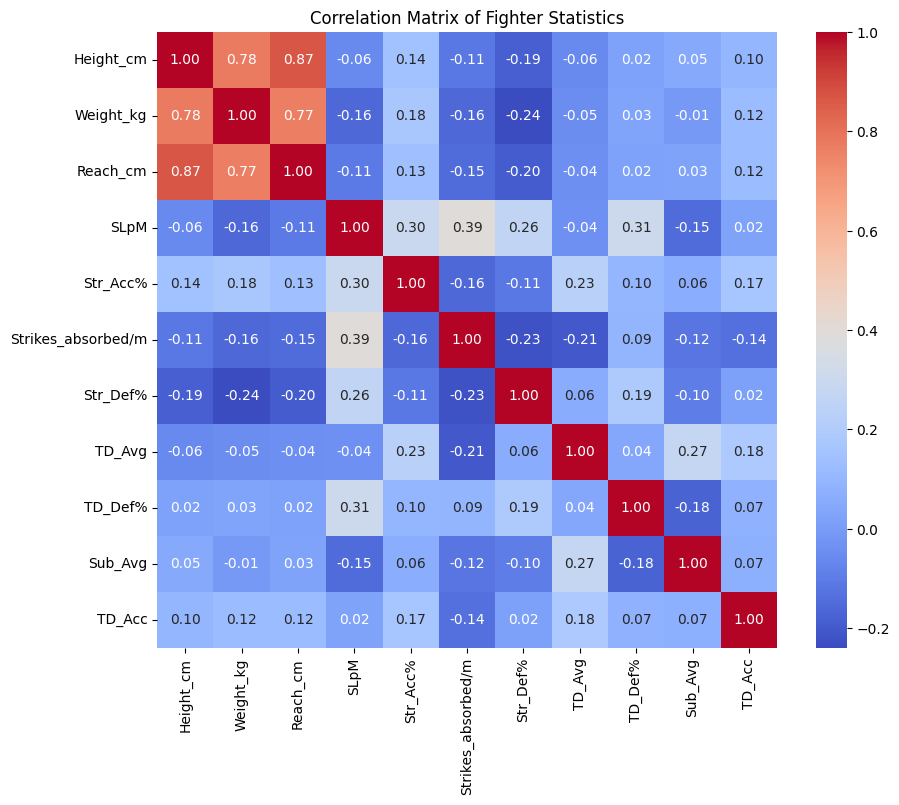

In [195]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Fighter Statistics')
plt.show()


In [196]:
merged_data.head()

,fighter_name,Height_cm,Weight_kg,Reach_cm,Stance,SLpM,Str_Acc%,Strikes_absorbed/m,Str_Def%,TD_Avg,TD_Def%,Sub_Avg,weight_class_x,TD_Acc,date,location,Winner,title_bout,weight_class_y,R_avg_KD,R_avg_SIG_STR_pct,R_avg_TD_pct,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_Height_cms,R_age
0,Felice Herrig,162.56,52,65,Orthodox,3.63,36.0,4.84,49.0,1.18,72.0,0.9,Straw Weight,30.0,7/23/2016,"Chicago, Illinois, USA",Red,False,WomenStrawweight,0.0,0.580000,0.500000,1.50,30.5000,18.00000,65.50000,46.000000,2.50000,0.50,18.5000,10.000000,1.50000,1.0,13.00000,4.500000,12.0000,9.000000,5.50000,4.5,230.000000,692.500000,5,0,1,0,1,1,1,0,0,0,0,0,1,162.56,31.0
1,Tecia Torres,154.94,52,60,Southpaw,4.30,47.0,3.37,62.0,0.68,56.0,0.1,Straw Weight,15.0,12/12/2015,"Las Vegas, Nevada, USA",Red,False,WomenStrawweight,0.5,0.440000,0.580000,0.00,138.0000,64.00000,172.00000,92.000000,6.50000,1.50,96.5000,35.500000,11.00000,9.0,124.50000,55.500000,11.5000,8.000000,2.00000,0.5,291.000000,900.000000,6,0,2,0,2,2,0,0,0,0,2,0,0,154.94,26.0
2,Loma Lookboonmee,154.94,52,61,Southpaw,5.16,55.0,3.09,59.0,0.67,72.0,0.0,Straw Weight,25.0,2/22/2020,"Auckland, New Zealand",Blue,False,WomenStrawweight,0.0,0.650000,0.160000,0.00,151.0000,99.00000,164.00000,112.000000,6.00000,1.00,66.0000,31.000000,14.00000,14.0,74.00000,38.000000,77.0000,61.000000,0.00000,0.0,23.000000,900.000000,3,0,1,0,1,1,0,0,0,1,0,0,0,154.94,24.0
3,Amanda Lemos,162.56,52,65,Southpaw,6.21,64.0,5.39,45.0,1.98,100.0,0.5,Straw Weight,100.0,8/22/2020,"Las Vegas, Nevada, USA",Red,False,WomenStrawweight,0.0,0.650000,1.000000,0.00,59.0000,38.00000,63.00000,42.000000,1.00000,1.00,42.5000,24.500000,6.50000,6.5,48.00000,29.000000,7.5000,6.500000,3.50000,2.5,87.000000,348.000000,3,0,0,1,1,1,1,0,0,0,0,0,1,162.56,33.0
4,Carla Esparza,154.94,52,63,Orthodox,2.29,42.0,2.85,53.0,3.44,48.0,0.3,Straw Weight,35.0,9/8/2018,"Dallas, Texas, USA",Blue,False,WomenStrawweight,0.0,0.388125,0.416563,0.25,109.1875,42.09375,224.71875,143.890625,7.21875,2.75,93.4375,30.203125,11.28125,8.5,87.40625,28.484375,9.8125,5.609375,11.96875,8.0,194.734375,891.296875,20,2,1,0,2,4,3,0,0,0,3,0,1,154.94,30.0


In [197]:
merged_data.dropna(inplace=True)
merged_data.isna().sum()


fighter_name                    0
Height_cm                       0
Weight_kg                       0
Reach_cm                        0
Stance                          0
SLpM                            0
Str_Acc%                        0
Strikes_absorbed/m              0
Str_Def%                        0
TD_Avg                          0
TD_Def%                         0
Sub_Avg                         0
weight_class_x                  0
TD_Acc                          0
date                            0
location                        0
Winner                          0
title_bout                      0
weight_class_y                  0
R_avg_KD                        0
R_avg_SIG_STR_pct               0
R_avg_TD_pct                    0
R_avg_REV                       0
R_avg_SIG_STR_att               0
R_avg_SIG_STR_landed            0
R_avg_TOTAL_STR_att             0
R_avg_TOTAL_STR_landed          0
R_avg_TD_att                    0
R_avg_TD_landed                 0
R_avg_HEAD_att

### Prediction of Takedown Efficiency (Takedown Success Rate)

In [198]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

In [199]:
features = [
    'R_avg_TD_att', 'R_avg_TD_landed',
    'R_avg_SIG_STR_pct', 'R_avg_REV', 'R_Height_cms',
    'R_total_time_fought(seconds)', 'R_total_rounds_fought', 'R_total_title_bouts', 
    'R_current_win_streak'
]
target = 'R_avg_TD_pct'


In [200]:
X = merged_data[features]
y = merged_data[target]

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [212]:
model = Sequential()
# model.add(Dense(64, input_dim=len(features), activation='relu'))
model.add(Dense(64, input_dim=9, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [213]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0791 - mae: 0.2050 - val_loss: 0.0488 - val_mae: 0.1672
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0362 - mae: 0.1394 - val_loss: 0.0395 - val_mae: 0.1446
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0271 - mae: 0.1193 - val_loss: 0.0327 - val_mae: 0.1293
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0217 - mae: 0.1071 - val_loss: 0.0311 - val_mae: 0.1297
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0218 - mae: 0.1083 - val_loss: 0.0303 - val_mae: 0.1284
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0182 - mae: 0.0972 - val_loss: 0.0298 - val_mae: 0.1263
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0176 - mae: 0.0967 - val_loss: 0.0270 - val_mae: 0.1212
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0149 - mae: 0.0895 - val_loss: 0.0278 - val_mae: 0.1288
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0144 - mae: 

In [214]:
# Example: Predict for a subset of the original data
new_data = merged_data[features].dropna()

# Scale the new data using the previously fitted scaler
scaled_new_data = scaler.transform(new_data)

# Make predictions
predictions = model.predict(scaled_new_data)

# Add predictions to the DataFrame for analysis
new_data['Predicted_TD_pct'] = predictions

# Display a few rows with predictions
print(new_data.head())


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
   R_avg_TD_att  R_avg_TD_landed  ...  R_current_win_streak  Predicted_TD_pct
0       2.50000             0.50  ...                     1          0.298856
1       6.50000             1.50  ...                     2          0.383683
2       6.00000             1.00  ...                     1          0.155671
3       1.00000             1.00  ...                     0          0.839348
4       7.21875             2.75  ...                     1          0.436339

[5 rows x 10 columns]


In [215]:
# Add predictions to the test DataFrame
test_data = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred.flatten()  # Flatten to match dimensions
})


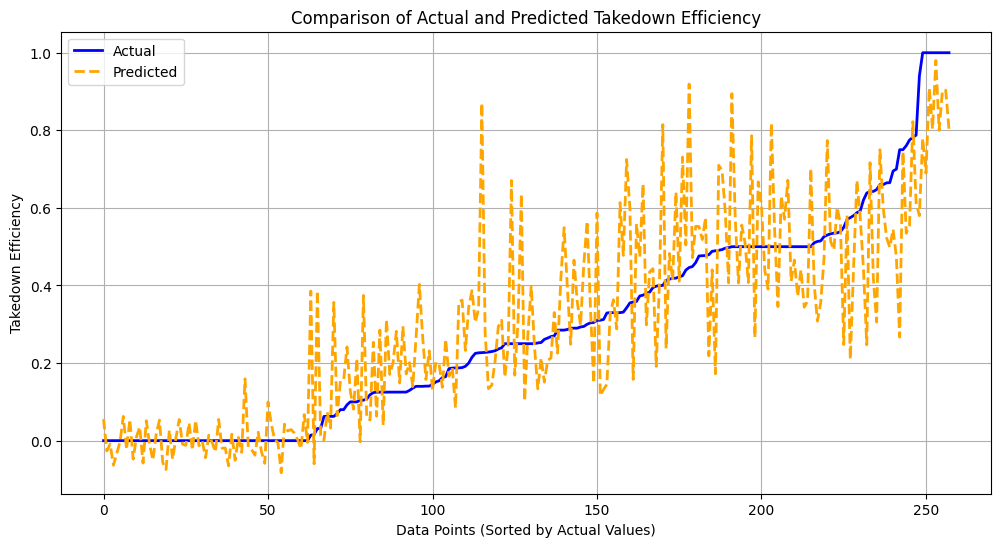

In [216]:
# Sort data for better trend visualization
test_data_sorted = test_data.sort_values(by='Actual').reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.plot(test_data_sorted['Actual'], label='Actual', color='blue', linewidth=2)
plt.plot(test_data_sorted['Predicted'], label='Predicted', color='orange', linestyle='--', linewidth=2)
plt.title('Comparison of Actual and Predicted Takedown Efficiency')
plt.xlabel('Data Points (Sorted by Actual Values)')
plt.ylabel('Takedown Efficiency')
plt.legend()
plt.grid(True)
plt.show()


In [217]:
print("Shape of X_train:", X_train.shape)


Shape of X_train: (1031, 9)


In [219]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = []

for train_index, test_index in kfold.split(X):
    # Split the data into train and validation sets
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    
    # Standardize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    
    # Build and train the model
    model = Sequential()
    model.add(Dense(64, input_dim=9, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    
    # Predict on validation set
    y_val_pred = model.predict(X_val)
    
    # Calculate mean squared error
    mse = mean_squared_error(y_val, y_val_pred)
    mse_scores.append(mse)

# Report cross-validation results
print("MSE scores for each fold:", mse_scores)
print("Average MSE:", np.mean(mse_scores))
print("Standard Deviation of MSE:", np.std(mse_scores))


C:\Users\H\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


C:\Users\H\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


C:\Users\H\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


C:\Users\H\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


C:\Users\H\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
MSE scores for each fold: [np.float64(0.0273305296352106), np.float64(0.025724377999080252), np.float64(0.02491197091530355), np.float64(0.018948402658505937), np.float64(0.01903177305792862)]
Average MSE: 0.02318941085320579
Standard Deviation of MSE: 0.003516084154541773


### HyperParameter Tuning


In [220]:
model = Sequential()
model.add(Dense(128, input_dim=len(features), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

C:\Users\H\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [221]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0958 - mae: 0.2269 - val_loss: 0.0402 - val_mae: 0.1532
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0355 - mae: 0.1439 - val_loss: 0.0281 - val_mae: 0.1262
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0286 - mae: 0.1266 - val_loss: 0.0289 - val_mae: 0.1224
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0206 - mae: 0.1067 - val_loss: 0.0212 - val_mae: 0.1048
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0193 - mae: 0.0994 - val_loss: 0.0221 - val_mae: 0.1150
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0177 - mae: 0.1017 - val_loss: 0.0192 - val_mae: 0.1034
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0160 - mae: 0.0923 - val_loss: 0.0203 - val_mae: 0.1065
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0176 - mae: 0.0988 - val_loss: 0.0179 - val_mae: 0.0999
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0156 - mae: 

In [222]:
# Example: Predict for a subset of the original data
new_data = merged_data[features].dropna()

# Scale the new data using the previously fitted scaler
scaled_new_data = scaler.transform(new_data)

# Make predictions
predictions = model.predict(scaled_new_data)

# Add predictions to the DataFrame for analysis
new_data['Predicted_TD_pct'] = predictions

# Display a few rows with predictions
print(new_data.head())


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
   R_avg_TD_att  R_avg_TD_landed  ...  R_current_win_streak  Predicted_TD_pct
0       2.50000             0.50  ...                     1          0.408242
1       6.50000             1.50  ...                     2          0.164721
2       6.00000             1.00  ...                     1          0.101782
3       1.00000             1.00  ...                     0          0.842192
4       7.21875             2.75  ...                     1          0.467234

[5 rows x 10 columns]


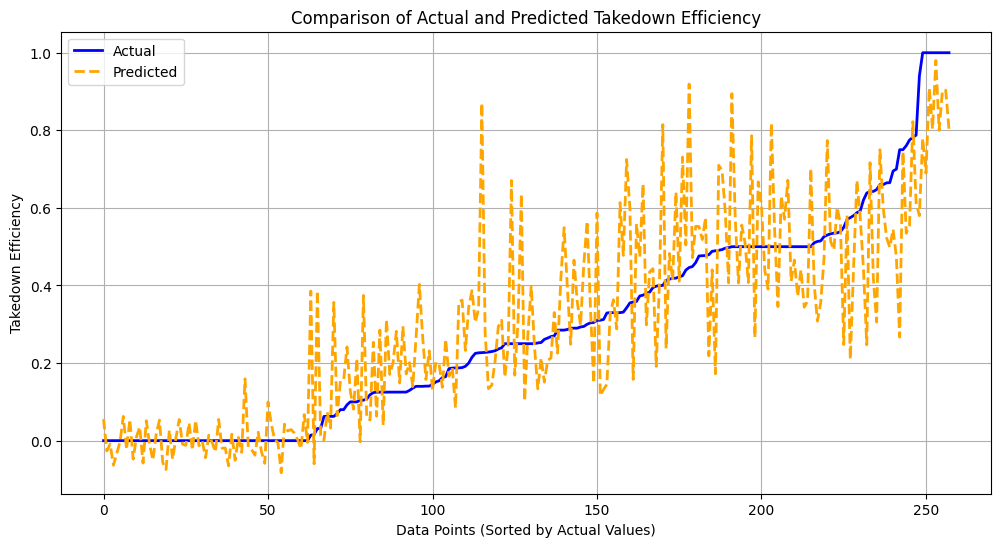

In [223]:
# Sort data for better trend visualization
test_data_sorted = test_data.sort_values(by='Actual').reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.plot(test_data_sorted['Actual'], label='Actual', color='blue', linewidth=2)
plt.plot(test_data_sorted['Predicted'], label='Predicted', color='orange', linestyle='--', linewidth=2)
plt.title('Comparison of Actual and Predicted Takedown Efficiency')
plt.xlabel('Data Points (Sorted by Actual Values)')
plt.ylabel('Takedown Efficiency')
plt.legend()
plt.grid(True)
plt.show()


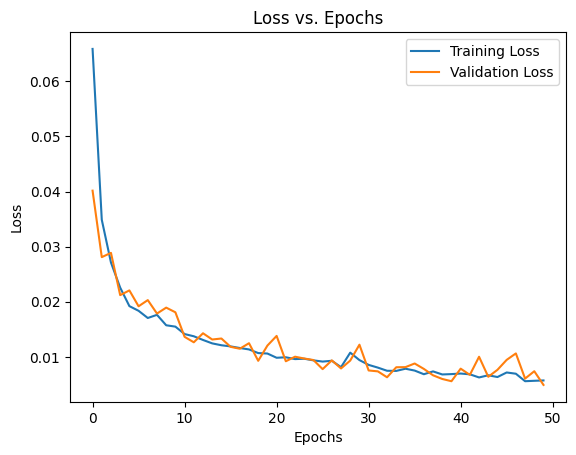

In [224]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot training and validation accuracy (if applicable)
if 'accuracy' in history.history:  # For classification tasks
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()


### The result above shows that overfitting is not an issue here, becuase validation loss is decrease with training loss